### 1.Import Necessary Libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### 2.Import Dataset

In [2]:
credit_details=pd.read_csv(r'D:\Study Materials\ExcelR\Data Science\Materials\Data Science - 12 October 21 - 3-5.30pm\November_23 LightGBM Theory _ Comparison Script\credit_card_clean.csv')
credit_details

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,highschool,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,male,highschool,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,male,highschool,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### 3. Data Understanding
###### Exploring the variable
* ID : ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1=male, 2=female)

* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

* MARRIAGE: Marital status (1=married, 2=single, 3=others)

* AGE: Age in years

* PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

#### Target variable
default.payment.next.month: Default payment (1=yes, 0=no)

###### Note: NT is Taiwain Dollars

In [3]:
credit_details.shape

(30000, 25)

In [4]:
credit_details.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [5]:
credit_details.dtypes

ID             int64
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

### 4. Data preparation 

In [6]:
del credit_details['ID']

In [7]:
credit_details2 = credit_details.copy()

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
credit_details2['SEX']= le.fit_transform(credit_details2['SEX'])
credit_details2['EDUCATION']= le.fit_transform(credit_details2['EDUCATION'])
credit_details2['MARRIAGE'] = le.fit_transform(credit_details2['MARRIAGE'])

In [9]:
credit_details2

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,0,3,0,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,1,0,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,1,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,3,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,1,0,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [10]:
credit_details2.dtypes

LIMIT_BAL    float64
SEX            int32
EDUCATION      int32
MARRIAGE       int32
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

### 4. Model Building

In [11]:
X = credit_details2.drop(labels='DEFAULT',axis=1)
Y = credit_details2[['DEFAULT']]

In [12]:
X.shape,Y.shape

((30000, 23), (30000, 1))

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,stratify=Y)

In [14]:
X_train.shape,Y_train.shape

((24000, 23), (24000, 1))

In [15]:
X_test.shape,Y_test.shape

((6000, 23), (6000, 1))

### 6. Model Training

In [16]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

import xgboost as axgb
import lightgbm as lbgm

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [17]:
rf_classifier = RandomForestClassifier()
adb_classifier = AdaBoostClassifier()
gbm_classifier = GradientBoostingClassifier()
xgbm_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()

#### Training Time Analysis

In [18]:
%%time
rf_classifier.fit(X_train,Y_train)

Wall time: 4.34 s


RandomForestClassifier()

In [19]:
%%time
gbm_classifier.fit(X_train,Y_train)

Wall time: 6.11 s


GradientBoostingClassifier()

In [20]:
%%time
adb_classifier.fit(X_train,Y_train)

Wall time: 1.46 s


AdaBoostClassifier()

In [21]:
%%time
xgbm_classifier.fit(X_train,Y_train)

[22:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 2.78 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
%%time
lgbm_classifier.fit(X_train,Y_train)

Wall time: 196 ms


LGBMClassifier()

### 7. Model Testing

#####  Test Data

In [23]:
y_pred_rf =rf_classifier.predict(X_test)
y_pred_adb =adb_classifier.predict(X_test)
y_pred_gbm =gbm_classifier.predict(X_test)
y_pred_xgbm =xgbm_classifier.predict(X_test)
y_pred_lgbm =lgbm_classifier.predict(X_test)

### 8. Model Evaluation

##### Random Forest Performance

In [24]:
print('Accuracy Score  :',round(accuracy_score(Y_test,y_pred_rf),4))
print('Precision Score :',round(precision_score(Y_test,y_pred_rf),4))
print('Recall Score    :',round(recall_score(Y_test,y_pred_rf),4))
print('Confusion Matrix:\n',confusion_matrix(Y_test,y_pred_rf))

Accuracy Score  : 0.8165
Precision Score : 0.6409
Recall Score    : 0.3873
Confusion Matrix:
 [[4385  288]
 [ 813  514]]


##### Adaboost Performance

In [25]:
print('Accuracy Score  :',round(accuracy_score(Y_test,y_pred_adb),4))
print('Precision Score :',round(precision_score(Y_test,y_pred_adb),4))
print('Recall Score    :',round(recall_score(Y_test,y_pred_adb),4))
print('Confusion Matrix:\n',confusion_matrix(Y_test,y_pred_adb))

Accuracy Score  : 0.8162
Precision Score : 0.6783
Recall Score    : 0.321
Confusion Matrix:
 [[4471  202]
 [ 901  426]]


#####  Gradient Boost Performance

In [26]:
print('Accuracy Score  :',round(accuracy_score(Y_test,y_pred_gbm),4))
print('Precision Score :',round(precision_score(Y_test,y_pred_gbm),4))
print('Recall Score    :',round(recall_score(Y_test,y_pred_gbm),4))
print('Confusion Matrix:\n',confusion_matrix(Y_test,y_pred_gbm))

Accuracy Score  : 0.822
Precision Score : 0.6702
Recall Score    : 0.3843
Confusion Matrix:
 [[4422  251]
 [ 817  510]]


##### XGBM Performance

In [27]:
print('Accuracy Score  :',round(accuracy_score(Y_test,y_pred_xgbm),4))
print('Precision Score :',round(precision_score(Y_test,y_pred_xgbm),4))
print('Recall Score    :',round(recall_score(Y_test,y_pred_xgbm),4))
print('Confusion Matrix:\n',confusion_matrix(Y_test,y_pred_xgbm))

Accuracy Score  : 0.8108
Precision Score : 0.6228
Recall Score    : 0.367
Confusion Matrix:
 [[4378  295]
 [ 840  487]]


##### LGBM Performance 

In [28]:
print('Accuracy Score  :',round(accuracy_score(Y_test,y_pred_lgbm),4))
print('Precision Score :',round(precision_score(Y_test,y_pred_lgbm),4))
print('Recall Score    :',round(recall_score(Y_test,y_pred_lgbm),4))
print('Confusion Matrix:\n',confusion_matrix(Y_test,y_pred_lgbm))

Accuracy Score  : 0.822
Precision Score : 0.6671
Recall Score    : 0.3896
Confusion Matrix:
 [[4415  258]
 [ 810  517]]


### Feature Importance

In [33]:
rf_features   = rf_classifier.feature_importances_
gbm_features  = gbm_classifier.feature_importances_
xgbm_features = xgbm_classifier.feature_importances_
lgbm_featues  = lgbm_classifier.feature_importances_
adb_featues   = adb_classifier.feature_importances_

In [30]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [76]:
feature_importance = pd.DataFrame({ 'Features'  : X_train.columns,
                                    'RF_Features': rf_features,
                                    'ADB_Features': adb_featues,
                                    'GBM_Features': gbm_features,
                                    'XGBM_Features': xgbm_features,
                                    'LGBM_Features': lgbm_featues})
feature_importance

,Features,RF_Features,ADB_Features,GBM_Features,XGBM_Features,LGBM_Features
0,LIMIT_BAL,0.060088,0.04,0.030430,0.022648,249
1,SEX,0.012258,0.02,0.002484,0.015449,28
2,EDUCATION,0.018207,0.00,0.002509,0.017482,58
3,MARRIAGE,0.012819,0.02,0.003277,0.018195,42
4,AGE,0.067713,0.00,0.006776,0.017176,209
5,PAY_1,0.091928,0.10,0.619326,0.387730,92
6,PAY_2,0.050594,0.06,0.090448,0.120165,52
7,PAY_3,0.025414,0.04,0.032887,0.042389,39
8,PAY_4,0.022660,0.00,0.012105,0.035801,38
9,PAY_5,0.022534,0.04,0.019377,0.047124,51


In [77]:
feature_importance2 = feature_importance.copy()

#### Display Important Features of Random Forest 

In [78]:
rf_imp_features =feature_importance2.sort_values(by= 'RF_Features', axis=0,ascending=False,)
rf_imp_features

,Features,RF_Features,ADB_Features,GBM_Features,XGBM_Features,LGBM_Features
5,PAY_1,0.091928,0.10,0.619326,0.387730,92
4,AGE,0.067713,0.00,0.006776,0.017176,209
0,LIMIT_BAL,0.060088,0.04,0.030430,0.022648,249
11,BILL_AMT1,0.060041,0.10,0.033100,0.023208,255
12,BILL_AMT2,0.053752,0.08,0.006959,0.020899,160
13,BILL_AMT3,0.053024,0.02,0.007415,0.018422,161
14,BILL_AMT4,0.051106,0.08,0.008361,0.019332,137
17,PAY_AMT1,0.051080,0.02,0.016131,0.019233,167
6,PAY_2,0.050594,0.06,0.090448,0.120165,52
16,BILL_AMT6,0.050086,0.10,0.008235,0.017695,151


In [79]:
import matplotlib.pyplot as plt

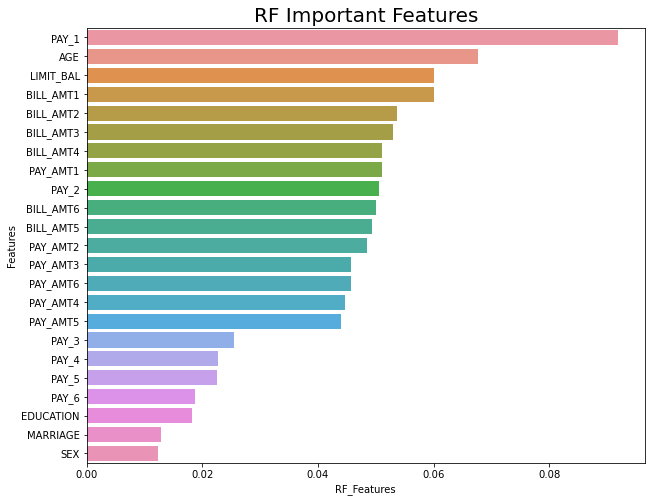

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(x='RF_Features',y='Features',data=rf_imp_features,)
plt.title('RF Important Features',size = 20)
plt.show()

#### Gradient Boost Important Features

In [89]:
gbm_imp_features = feature_importance2.sort_values(by = 'GBM_Features',axis=0,ascending=False)
gbm_imp_features

,Features,RF_Features,ADB_Features,GBM_Features,XGBM_Features,LGBM_Features
5,PAY_1,0.091928,0.10,0.619326,0.387730,92
6,PAY_2,0.050594,0.06,0.090448,0.120165,52
11,BILL_AMT1,0.060041,0.10,0.033100,0.023208,255
7,PAY_3,0.025414,0.04,0.032887,0.042389,39
0,LIMIT_BAL,0.060088,0.04,0.030430,0.022648,249
18,PAY_AMT2,0.048445,0.12,0.026165,0.024433,216
10,PAY_6,0.018791,0.02,0.022784,0.037224,63
9,PAY_5,0.022534,0.04,0.019377,0.047124,51
19,PAY_AMT3,0.045757,0.04,0.017448,0.021599,166
17,PAY_AMT1,0.051080,0.02,0.016131,0.019233,167


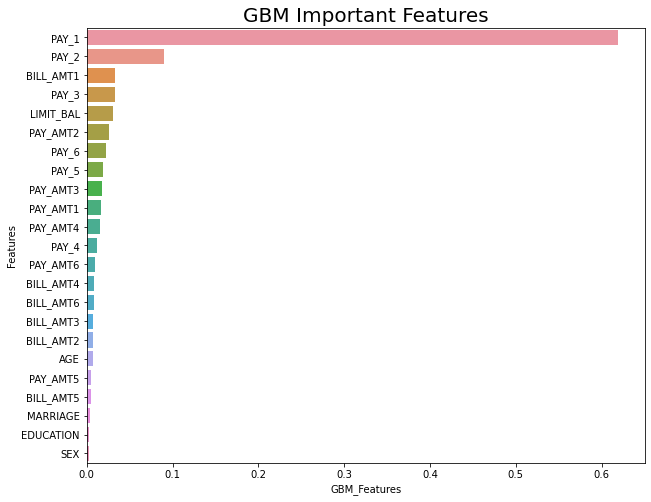

In [90]:
plt.figure(figsize=(10,8))
sns.barplot(x='GBM_Features',y='Features',data=gbm_imp_features,)
plt.title('GBM Important Features',size = 20)
plt.show()

#### ADABOOST important Features

In [88]:
adb_imp_features = feature_importance2.sort_values(by = 'ADB_Features',axis=0,ascending=False)
adb_imp_features

,Features,RF_Features,ADB_Features,GBM_Features,XGBM_Features,LGBM_Features
18,PAY_AMT2,0.048445,0.12,0.026165,0.024433,216
11,BILL_AMT1,0.060041,0.10,0.033100,0.023208,255
16,BILL_AMT6,0.050086,0.10,0.008235,0.017695,151
5,PAY_1,0.091928,0.10,0.619326,0.387730,92
12,BILL_AMT2,0.053752,0.08,0.006959,0.020899,160
14,BILL_AMT4,0.051106,0.08,0.008361,0.019332,137
6,PAY_2,0.050594,0.06,0.090448,0.120165,52
19,PAY_AMT3,0.045757,0.04,0.017448,0.021599,166
15,BILL_AMT5,0.049410,0.04,0.004544,0.018232,134
0,LIMIT_BAL,0.060088,0.04,0.030430,0.022648,249


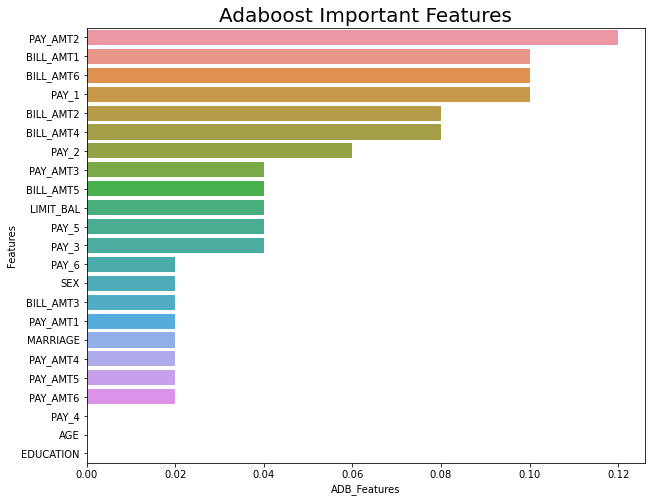

In [93]:
plt.figure(figsize=(10,8))
sns.barplot(x='ADB_Features',y='Features',data=adb_imp_features,)
plt.title('Adaboost Important Features',size = 20)
plt.show()

#### Extreme Gradient Boosting Features

In [94]:
xgbm_imp_features = feature_importance2.sort_values(by= 'XGBM_Features',axis=0,ascending=False)
xgbm_imp_features

,Features,RF_Features,ADB_Features,GBM_Features,XGBM_Features,LGBM_Features
5,PAY_1,0.091928,0.10,0.619326,0.387730,92
6,PAY_2,0.050594,0.06,0.090448,0.120165,52
9,PAY_5,0.022534,0.04,0.019377,0.047124,51
7,PAY_3,0.025414,0.04,0.032887,0.042389,39
10,PAY_6,0.018791,0.02,0.022784,0.037224,63
8,PAY_4,0.022660,0.00,0.012105,0.035801,38
18,PAY_AMT2,0.048445,0.12,0.026165,0.024433,216
11,BILL_AMT1,0.060041,0.10,0.033100,0.023208,255
0,LIMIT_BAL,0.060088,0.04,0.030430,0.022648,249
19,PAY_AMT3,0.045757,0.04,0.017448,0.021599,166


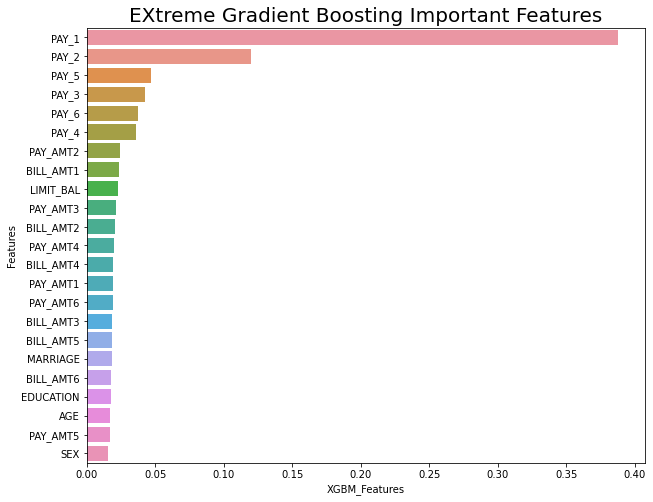

In [95]:
plt.figure(figsize=(10,8))
sns.barplot(x='XGBM_Features',y='Features',data=xgbm_imp_features,)
plt.title('EXtreme Gradient Boosting Important Features',size = 20)
plt.show()

#### Light Gradient Boosting Feature Importance

In [96]:
lgbm_imp_features = feature_importance2.sort_values(by = 'LGBM_Features', axis=0 , ascending=False)
lgbm_imp_features

,Features,RF_Features,ADB_Features,GBM_Features,XGBM_Features,LGBM_Features
11,BILL_AMT1,0.060041,0.10,0.033100,0.023208,255
0,LIMIT_BAL,0.060088,0.04,0.030430,0.022648,249
18,PAY_AMT2,0.048445,0.12,0.026165,0.024433,216
4,AGE,0.067713,0.00,0.006776,0.017176,209
22,PAY_AMT6,0.045641,0.02,0.009112,0.019113,207
21,PAY_AMT5,0.044045,0.02,0.004965,0.016744,173
17,PAY_AMT1,0.051080,0.02,0.016131,0.019233,167
19,PAY_AMT3,0.045757,0.04,0.017448,0.021599,166
13,BILL_AMT3,0.053024,0.02,0.007415,0.018422,161
12,BILL_AMT2,0.053752,0.08,0.006959,0.020899,160


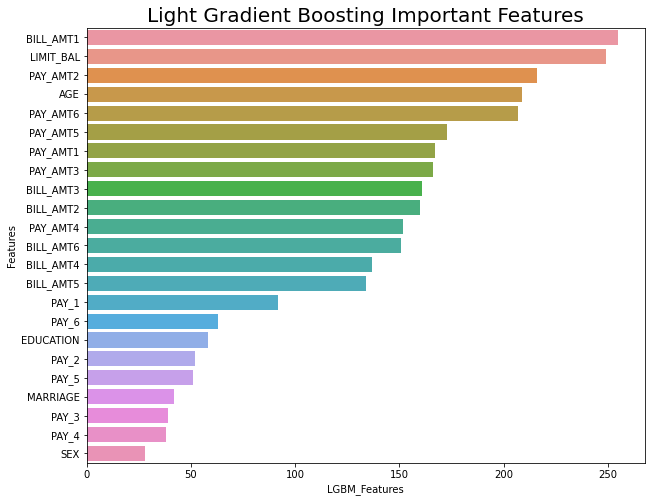

In [97]:
plt.figure(figsize=(10,8))
sns.barplot(x='LGBM_Features',y='Features',data=lgbm_imp_features,)
plt.title('Light Gradient Boosting Important Features',size = 20)
plt.show()